In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd

C:\Users\Admin


In [3]:
cd Desktop/

C:\Users\Admin\Desktop


In [4]:
cd Lekan/

C:\Users\Admin\Desktop\Lekan


In [5]:
cd Tech/

C:\Users\Admin\Desktop\Lekan\Tech


In [6]:
cd daily-bike-share.txt

[WinError 267] The directory name is invalid: 'daily-bike-share.txt'
C:\Users\Admin\Desktop\Lekan\Tech


In [7]:
bike=pd.read_csv('daily-bike-share.txt')

In [8]:
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


######   dtday==date on which data is observed
######   season== (1:winter, 2:spring,  3:summer,  4:fall)
######   yr==(0:2011, 1:2012)
######   mnth=(1:Jan.......12:Dec)
######   holiday==binary values indicating weather the days are holiday or not
######   weekday==(0:Sunday......6:Saturday)
######   workingday==binary values indicating weather the day is working or not (not holiday or weekend)
######   weathersit==categorical values indicating the waether(1:Clear, 2:Mist/Cloud, 3:Light rain/snow, 4:Heavy rain/hail/snow/fog)
######   temp==Temperature in celsius(normalized)
######   atemp==The apparent temp(normalized)
######   hum== Humidity level(normalized)
######   windspeed== The windspeed(normalized)
######   rentals== The number of bicycle rentals recorded

####  Adding a new column for the day 1-30th/31st of the month

In [9]:
bike['day']=pd.DatetimeIndex(bike['dteday']).day
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


######  statistics

In [10]:
num_features=['temp','atemp','hum','windspeed',]
bike[num_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


####  Visualizing the data distribution

Mean: 848.1764705882352
Median: 713.0
Mode: 120


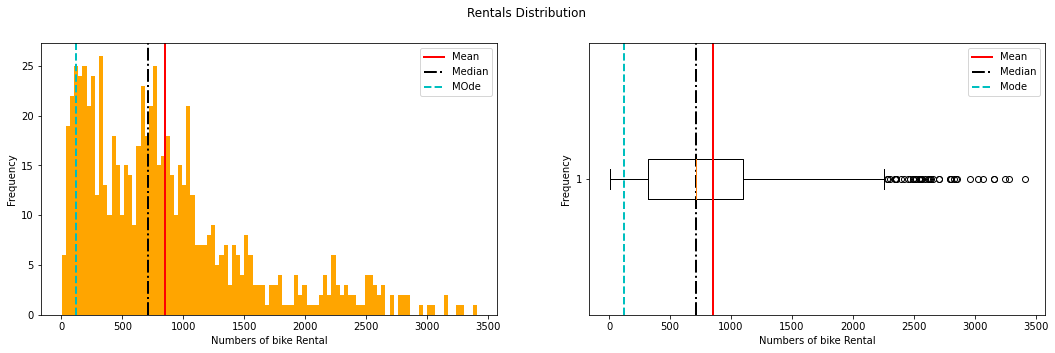

In [11]:
# visualizing the data distribution with histogram and boxplot

label=bike['rentals']
print('Mean:',label.mean())
print('Median:',label.median())
print('Mode:',label.mode()[0])


#creat a fig with 2 subplots
fig,ax=plt.subplots(1,2,figsize=(18,5))

#plot hist
ax[0].hist(label,bins=100,color='orange');
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Numbers of bike Rental')


#mark the line of mean,meadin & mode
ax[0].axvline(label.mean(),color='red',linestyle='-',linewidth=2,label='Mean')
ax[0].axvline(label.median(),color='k',linestyle='-.',linewidth=2,label='Median')
ax[0].axvline(label.mode()[0],color='c',linestyle='--',linewidth=2,label='MOde')
ax[0].legend()

#plot boxplot
ax[1].boxplot(label, vert=False);
ax[1].set_xlabel('Numbers of bike Rental')
ax[1].set_ylabel('Frequency')


#mark line mean,median and mode
ax[1].axvline(label.mean(),color='red',linestyle='-',linewidth=2,label='Mean')
ax[1].axvline(label.median(),color='k',linestyle='-.',linewidth=2,label='Median')
ax[1].axvline(label.mode()[0],color='c',linestyle='--',linewidth=2,label='Mode')
ax[1].legend()


fig.suptitle('Rentals Distribution');


In [12]:
label.median()

713.0

 ###### The plot shows that the number of bike ranges from 0-3400, but the mean,median & mode are closer to the lower values; which show that the average bike sold per day is 713...
 ######   the data above show some outliers from about 2250

### Ploting hist for all the numeric values
  temp,
  atemp,
  hum,
  windspeed

temp 0.49538478850889184
temp 0.49833299999999997
temp 0.265833
atemp 0.47435398864569067
atemp 0.48673299999999997
atemp 0.654688
hum 0.6278940629274962
hum 0.626667
hum 0.613333
windspeed 0.1904862116279068
windspeed 0.180975
windspeed 0.10635


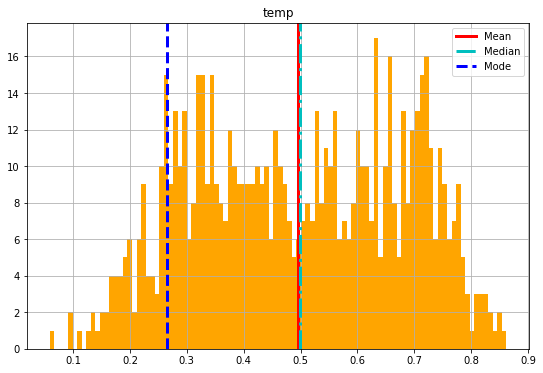

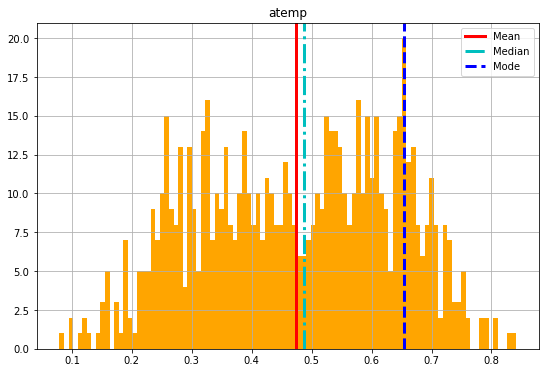

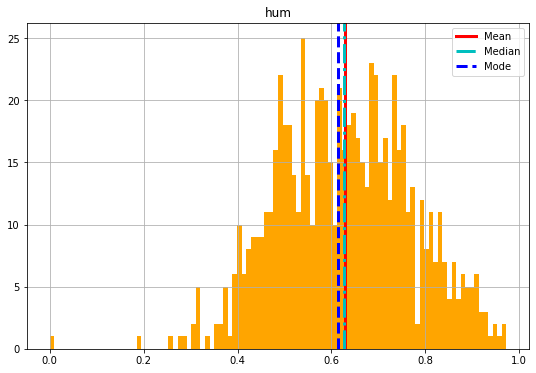

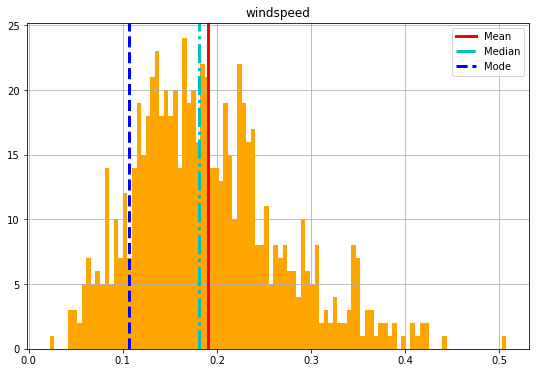

In [13]:
for col in num_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=bike[col]
    feature.hist(bins=100,color='orange')
    ax.axvline(feature.mean(),color='r',linestyle='-',linewidth=3,label='Mean')
    ax.axvline(feature.median(),color='c',linestyle='-.',linewidth=3,label='Median')
    ax.axvline(feature.mode()[0],color='b',linestyle='--',linewidth=3,label='Mode')
    ax.legend()
    ax.set_title(col)
    
    print(col,feature.mean())
    print(col,feature.median())
    print(col,feature.mode()[0])

######   The mean of the numeric values are evenly distributed..

###  Exploring the categorical values

In [14]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


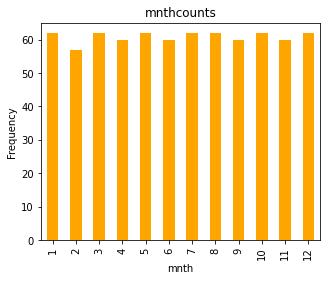

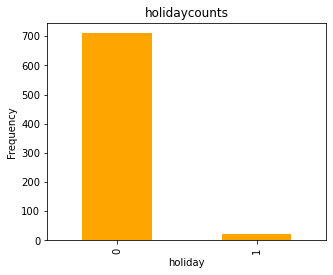

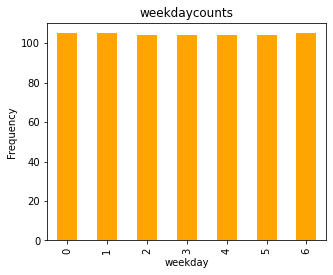

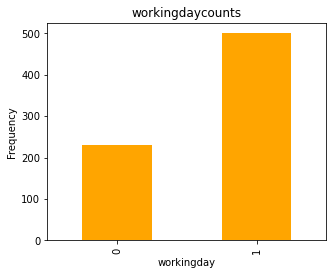

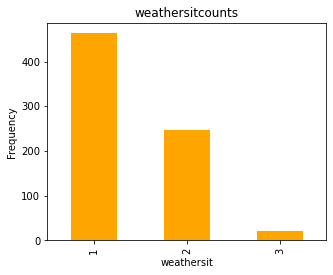

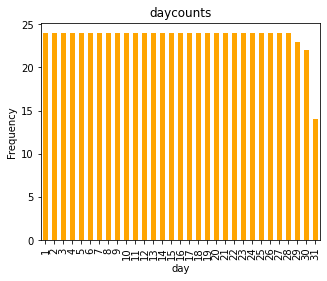

<Figure size 360x288 with 0 Axes>

In [15]:
categ_features=['season','mnth','holiday','weekday','workingday','weathersit','day']
for col in categ_features:
    counts=bike[col].value_counts().sort_index()
    ax=fig.gca()
    fig=plt.figure(figsize=(5,4))
    counts.plot(kind='bar',color='orange',ax=ax)
    ax.set_title(col + 'counts')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)

#####  The categorical data are evenly distributeed but with the exception of the following
###### Holidays:inwhich most bike are sold during hilodays
###### workimgday: shows that less bike are sold during workingday
######  weathersit: which shows that bike are mostly sold on a clear day follwed by a mist then least is a light raniy day

####  Checking the correlation btw the numeric features and the rentals

0.5432846616821875
0.5438636902622048
-0.07700788276308998
-0.1676133493038069


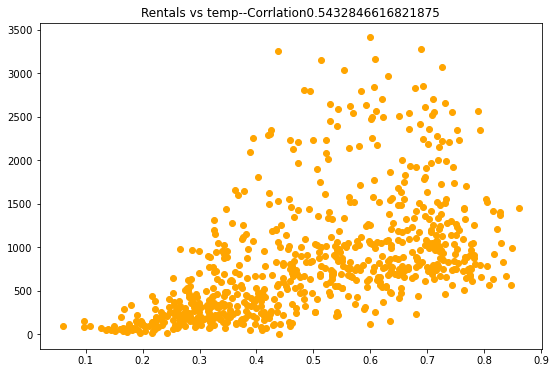

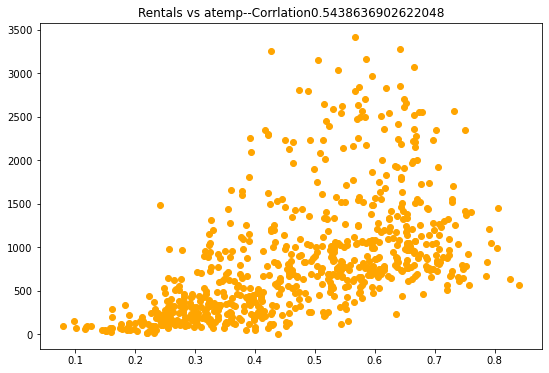

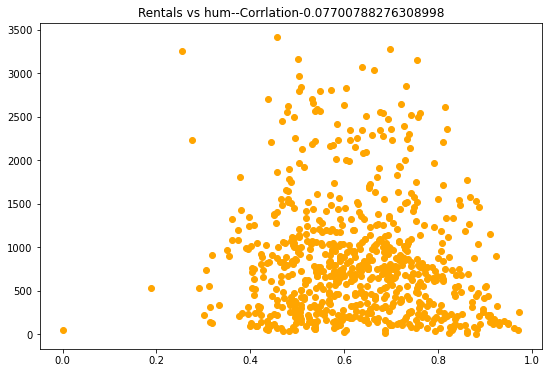

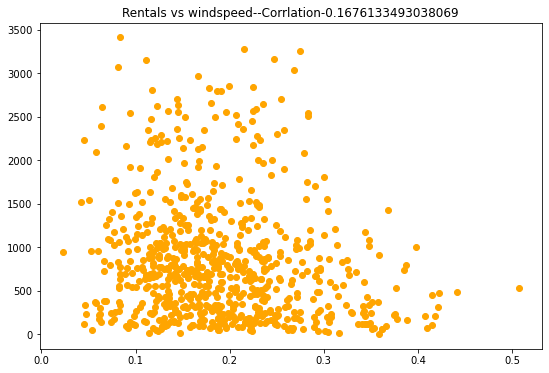

In [26]:
for col in num_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=bike[col]
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label,color='orange')
    plt.xlabel=(feature)
    plt.title('Rentals vs ' + col +'--Corrlation' + str(correlation) )
    print(correlation)

####### we notice that temp & atemp tends to show a dirct prop relationship, as the temp increase,the rentals increase and there corr is abour 0.5,but hum & windspreed are otherwise 

###  Creating a categorical features using boxplots to show data distribution

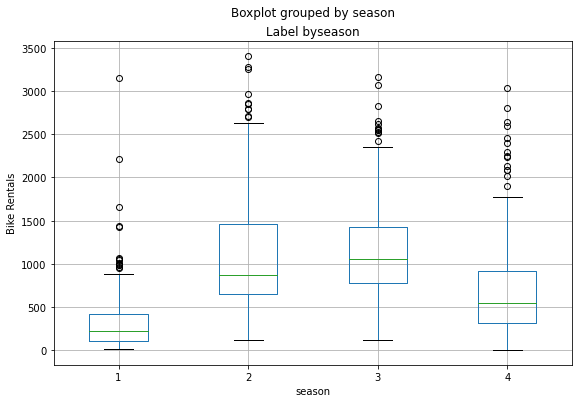

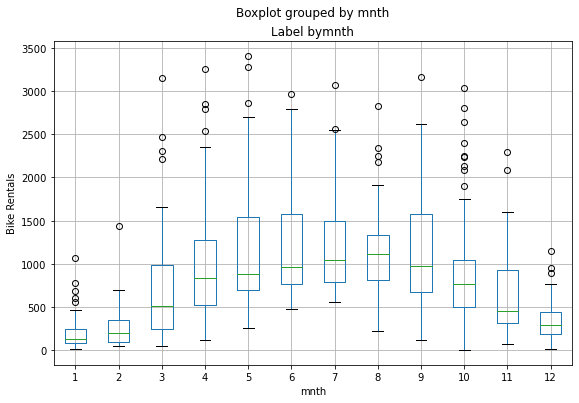

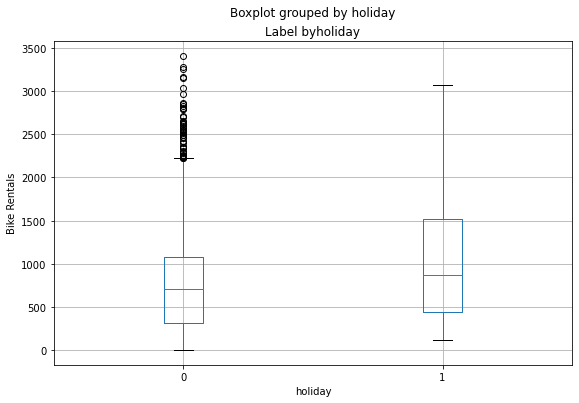

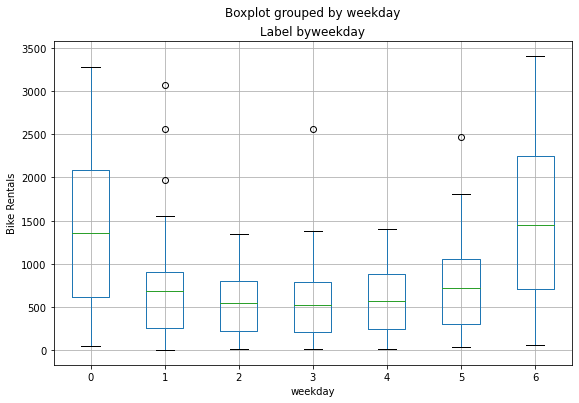

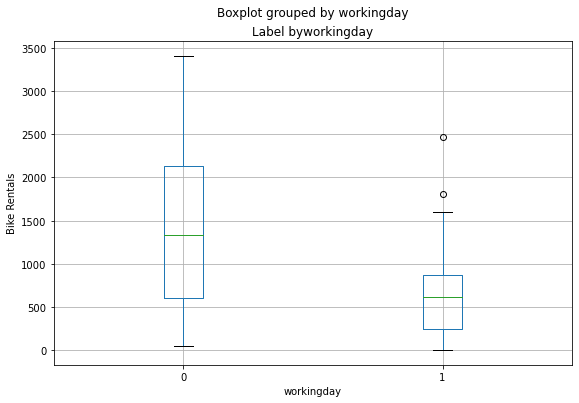

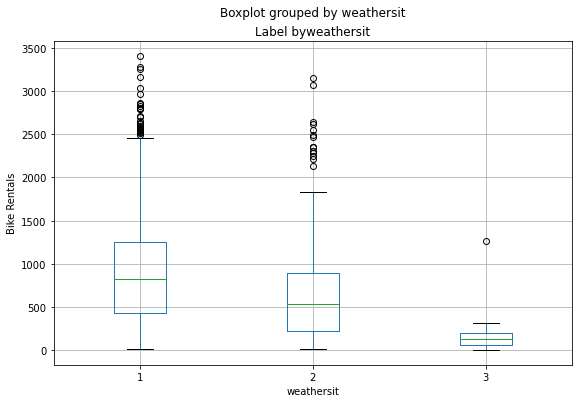

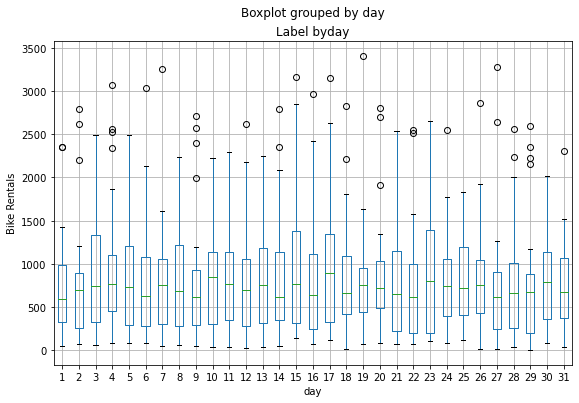

In [17]:
for col in categ_features:
    fig=plt.figure(figsize=(9,6));
    ax=fig.gca()
    bike.boxplot(column='rentals',by=col,ax=ax)
    ax.set_title('Label by'+col)
    ax.set_ylabel('Bike Rentals')

### The above plot shows the variance in the relationship btw some category values and retals
####### for season and for months: shows a coresponding variation
####### for months:
####### for weekdays less are rent out from 1-5 monday-friday
####### for holidays and workingdays: more bike is rented on 1()holidays while more is gotten on 0()workingdays
####### for  weathersit more is gotten on 1,then 2,and 3 fianlly
####### day doesn't shows little variation

###  Tran a Regression Model

In [18]:
x,y=bike[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values,bike['rentals']
print('feature',x[:10],
      'Label:',y[:10],sep='\n')

feature
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        0.

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
print('Training value: %d row\nTest values: %d rows' %(x_train.shape[0],x_test.shape[0]))

Training value: 511 row
Test values: 220 rows


In [20]:
from sklearn.linear_model import LinearRegression
#fit a linear regression
model=LinearRegression().fit(x_train,y_train)
model

LinearRegression()

####  Evaluate the Tranied Model


In [21]:
pred=model.predict(x_test)
np.set_printoptions(suppress=True)
print('Predict Values:',(np.round(pred)[:10]),'\n  Actual values',y_test.values[:10])


Predict Values: [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.] 
  Actual values [2418  754  222   47  244  145  240  555 3252   38]


In [22]:
predicted_values=np.round(pred)
Actual_values=y_test.values
Error_values=(predicted_values-Actual_values)

In [23]:
table=pd.DataFrame({'predicted_values':predicted_values,'Actual_values':Actual_values,'Error_values':Error_values})
table

,predicted_values,Actual_values,Error_values
0,1896.0,2418,-522.0
1,1184.0,754,430.0
2,1007.0,222,785.0
3,-28.0,47,-75.0
4,314.0,244,70.0
...,...,...,...
215,175.0,269,-94.0
216,1226.0,1383,-157.0
217,521.0,318,203.0
218,1232.0,644,588.0


######  using a scatter plot to determine how well the model is predicted

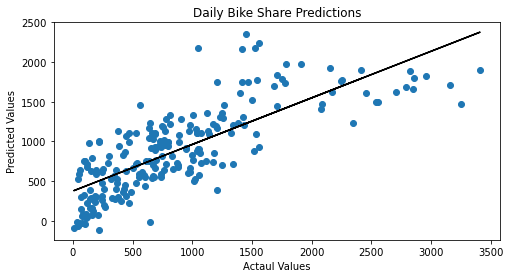

In [28]:
fig=plt.figure(figsize=(8,4));
ax=fig.gca()
plt.scatter(y_test,pred)
plt.ylabel('Predicted Values')
plt.title('Daily Bike Share Predictions')
ax.set_xlabel('Actaul Values')

#overlay the regression line using poly1dimesion
z=np.polyfit(y_test,pred,1,) ###z=slop and intercept
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='k');

### using MSE,RMSE & R-Squared or R2 to determine the value error

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
#MSE      diferr btw pred and actual
mse=mean_squared_error(y_test,pred)

##RMSE     square root of MSE
rmse=np.sqrt(mse)

#R2    predict it the model from 0-1
r2=r2_score(y_test,pred)
print('MSE:',mse,'\n\nRMSE:',rmse,'\n\nR2:',r2)

MSE: 201972.55947035595 

RMSE: 449.4135728595165 

R2: 0.604045473691919
